<a href="https://colab.research.google.com/github/anggaagustiratelkom/Machine-Learning/blob/master/Klasifikasi%20dan%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRARY DAN IMPORT DATASET DARI G-DRIVE**

**IMPORT LIBRARY**

In [0]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import copy as cp
from google.colab import files
sns.set_style("whitegrid")
%matplotlib inline  
sns.set()


**IMPORT DATASET DARI DRIVE KE COLAB**

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**CEK LOKASI KETERSEDIAAN DATABASE DI COLAB**

In [0]:
!ls "drive/My Drive/Colab Notebooks/Machine Learning/Tubes/fifa20.csv"

'drive/My Drive/Colab Notebooks/Machine Learning/Tubes/fifa20.csv'


# **KLASIFIKASI DATASET AKAN DIPAKAI**

**MEMASUKKAN DATASET KE VARIABEL DAN MEMILIH DATASET YANG AKAN DIPAKE**

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Tubes/fifa20.csv')
dataset = dataset[["height_cm","weight_kg","passing","dribbling","body_type"]]
dataset.head()
dataset.shape

(18278, 5)

**MENGECEK KORELASI ANTAR DATA YANG AKAN DIPAKAI**

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

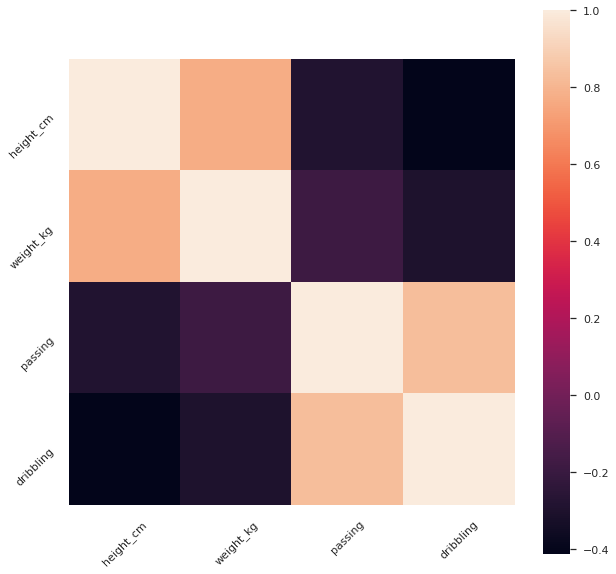

In [0]:
corr = dataset.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
# ax.set_xticklabels(rotation=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [0]:
dataset.groupby('body_type').count()

,height_cm,weight_kg,passing,dribbling
body_type,,,,
Akinfenwa,1,1,1,1
C. Ronaldo,1,1,1,1
Courtois,1,1,0,0
Lean,6505,6505,6043,6043
Messi,1,1,1,1
Neymar,1,1,1,1
Normal,10750,10750,9293,9293
PLAYER_BODY_TYPE_25,1,1,1,1
Shaqiri,1,1,1,1


**DATA BODY TYPE**

Mengganti data body_type dari String menjadi int


In [0]:
dataset = dataset.replace(to_replace ="Stocky", value =0)
dataset = dataset.replace(to_replace ="Normal", value =1)
dataset = dataset.replace(to_replace ="Lean", value =2)

In [0]:
index = dataset[(dataset['body_type'] != 0)&(dataset['body_type'] != 1)&(dataset['body_type'] != 2)].index
dataset.drop(index, inplace=True)
dataset.shape

(18271, 5)

**DATA HEIGHT DAN WEIGHT**

Meminimalisir data  outlier

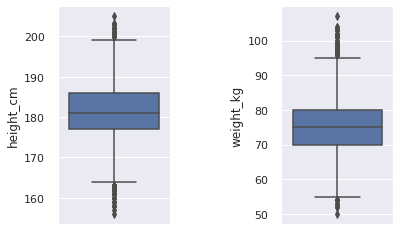

In [0]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=dataset["height_cm"], ax=axes[0])
sns.boxplot(y=dataset["weight_kg"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
index = dataset[(dataset['height_cm'] >= 200)|(dataset['height_cm'] <= 163)].index
dataset.drop(index, inplace=True)
dataset.shape

(18182, 5)

In [0]:
index = dataset[(dataset['weight_kg'] >= 95)|(dataset['weight_kg'] <= 54)].index
dataset.drop(index, inplace=True)
dataset.shape

(18092, 5)

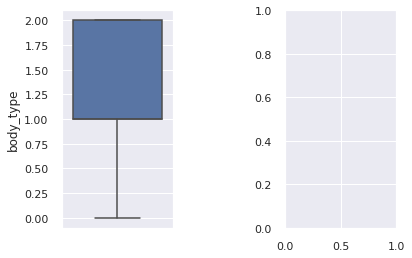

In [0]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=dataset["body_type"], ax=axes[0])
plt.subplots_adjust(wspace=1)

**DATA Passing dan Dribbling**

Meminimalisir data  outlier dan data null

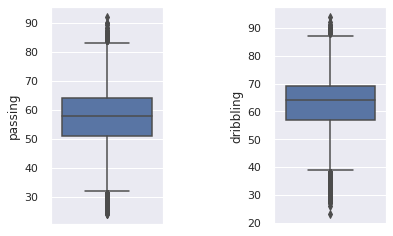

In [0]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=dataset["passing"], ax=axes[0])
sns.boxplot(y=dataset["dribbling"], ax=axes[1])
plt.subplots_adjust(wspace=1)

Mendrop data passing outlier

In [0]:
index = dataset[(dataset['passing'] >= 84)|(dataset['passing'] <= 32)].index
dataset.drop(index, inplace=True)
dataset.shape
dataset.head()

,height_cm,weight_kg,passing,dribbling,body_type
3,188,87,NaN,NaN,1
6,187,85,NaN,NaN,1
7,193,92,70.0,71.0,1
10,178,73,78.0,90.0,1
11,187,89,54.0,67.0,1


Mendrop data dribbling oulier

In [0]:
index = dataset[(dataset['dribbling'] >= 87)|(dataset['dribbling'] <= 43)].index
dataset.drop(index, inplace=True)
dataset.shape

(17047, 5)

Mengisi data nan dengan data means dari kolom passing dan dribbling

In [0]:
dataset.passing.fillna(dataset.passing.median(), inplace=True)
dataset.dribbling.fillna(dataset.dribbling.median(), inplace=True)
dataset.shape

(17047, 5)

**FIX DATASET**

Dataset yang sudah di minimalisir dari outlier dan null dimasukkan ke variabel dataset baru

In [0]:
dataset = dataset[["height_cm","weight_kg","passing","dribbling","body_type"]]
dataset.head()

,height_cm,weight_kg,passing,dribbling,body_type
3,188,87,59.0,64.0,1
6,187,85,59.0,64.0,1
7,193,92,70.0,71.0,1
11,187,89,54.0,67.0,1
12,188,89,79.0,81.0,1


# **KLASIFIKASI 1**



**MENENTUKAN LABEL**

Label yg dipakai ("body_type") dan fitur yang dipakai ("passing" dan "dribbling")

In [0]:
label1 = dataset['body_type'].tolist()
fitur1 = dataset.drop(columns=["passing","dribbling","body_type"])
fitur1.head()

,height_cm,weight_kg
3,188,87
6,187,85
7,193,92
11,187,89
12,188,89


**SPLIT DATASET**

Mensplit dataset dan label yang akan dipakai dengan datatrain : 70% dan datates : 30%

In [0]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(fitur1, label1, test_size=0.3, random_state = 0)

**PROSES TRAINING**

Pembuktian dengan metode yang dipakai yaitu Naive Bayes

In [0]:
model = GaussianNB()
model.fit(x_train1,y_train1)

y_predict1 = model.predict(x_test1)
y_predict1

array([1, 2, 2, ..., 1, 1, 1])

Confusion matriks

In [0]:
y_actu1 = pd.Series(y_test1, name='Actual')
y_pred1 = pd.Series(y_predict1, name='Predicted')
fitur1_confusion = pd.crosstab(y_actu1, y_pred1)

fitur1_confusion

Predicted,1,2
Actual,,
0,233,40
1,2362,642
2,1129,709


In [0]:
print(classification_report(y_test1,y_predict1,labels=np.unique(y_predict1)))

              precision    recall  f1-score   support

           1       0.63      0.79      0.70      3004
           2       0.51      0.39      0.44      1838

   micro avg       0.60      0.63      0.62      4842
   macro avg       0.57      0.59      0.57      4842
weighted avg       0.59      0.63      0.60      4842



In [0]:
print("Akurasi Model : ",metrics.accuracy_score(y_test1,y_predict1))

Akurasi Model :  0.6003910068426197


# **KLASIFIKASI 2**

**MENENTUKAN LABEL**

Label yg dipakai ("body_type") dan fitur yang dipakai ("height_cm" dan "weight_kg")

In [0]:
label2 = dataset['body_type'].tolist()
fitur2 = dataset.drop(columns=["height_cm","weight_kg","body_type"])
fitur2.head()

,passing,dribbling
3,59.0,64.0
6,59.0,64.0
7,70.0,71.0
11,54.0,67.0
12,79.0,81.0


**SPLIT DATASET**

Mensplit dataset dan label yang akan dipakai dengan datatrain : 70% dan datates : 30%

In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(fitur2, label2, test_size=0.3, random_state = 0)

**PROSES TRAINING**

Pembuktian dengan metode yang dipakai yaitu Naive Bayes

In [0]:
model = GaussianNB()
model.fit(x_train2,y_train2)

y_predict2 = model.predict(x_test2)

y_predict2

array([1, 1, 1, ..., 1, 1, 1])

Confusion matriks

In [0]:
y_actu2 = pd.Series(y_test2, name='Actual')
y_pred2 = pd.Series(y_predict2, name='Predicted')
fitur2_confusion = pd.crosstab(y_actu2, y_pred2)

fitur2_confusion



Predicted,1,2
Actual,,
0,267,6
1,2955,49
2,1792,46


In [0]:
print(classification_report(y_test2,y_predict2,labels=np.unique(y_predict2)))

              precision    recall  f1-score   support

           1       0.59      0.98      0.74      3004
           2       0.46      0.03      0.05      1838

   micro avg       0.59      0.62      0.60      4842
   macro avg       0.52      0.50      0.39      4842
weighted avg       0.54      0.62      0.48      4842



In [0]:
print("Akurasi Model : ",metrics.accuracy_score(y_test2,y_predict2))

Akurasi Model :  0.5867057673509286


# **CLUSTERING**

**DATASET CLUSTERING**

Menentukan dataset yang akan dipakai pada clustering 

In [0]:
cluster = dataset[["passing","dribbling"]]
cluster.describe()

,passing,dribbling
count,17047.000000,17047.000000
mean,58.403238,63.978530
std,8.707941,7.789687
min,33.000000,44.000000
25%,53.000000,59.000000
50%,59.000000,64.000000
75%,64.000000,69.000000
max,83.000000,86.000000


**K DENGAN METODE K MEANS**

Menentukan nilai K dengan metode K Means dengan melihat grafik yang mendekati nilai distortion linier pada setiap K

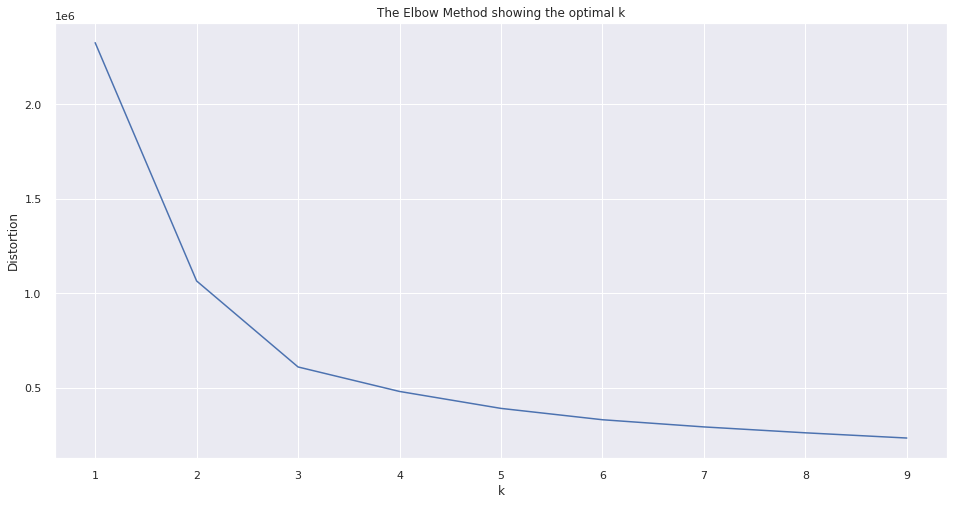

In [0]:
distortions = []
K = range(1,10)
for k in K:
    #fit data dengan 3 cluster
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**CENTROID CLUSTERING**

Membuat centroid sebanyak nilai k dengan random angka posisi x dan y dari 30 - 100, karena data pada clustering yang dipakai tidak kurang dari 30 dan tidak lebih dari 100


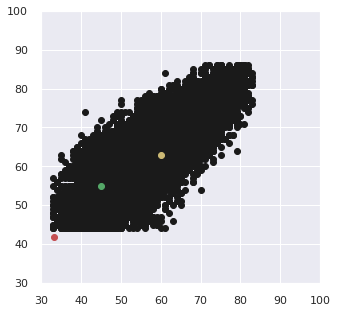

In [0]:
k = 3
# centroid[i] = [x, y]
x,y = [],[]
for i in range(k):
  x.append(round(np.random.uniform(30, 100),2))
  y.append(round(np.random.uniform(30, 100),2))
x,y
centroid = {
  i+1: [x[i],y[i]]
  for i in range(k)
}
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster["passing"], cluster["dribbling"], color="k")
colmap = {1: "r", 2: "y", 3: "g"}
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**HITUNG CENTROID**

Menghitung jarak antara setiap centroid dengan setiap data, dan memberikan warna untuk data yang terdekat dengan centroidnya 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


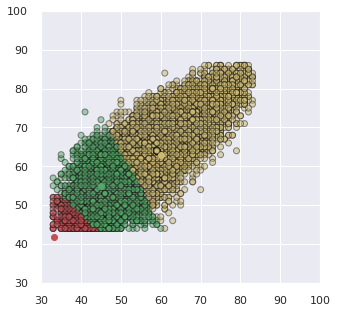

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color
3,59.0,64.0,34.044315,1.548580,16.581061,2,y
6,59.0,64.0,34.044315,1.548580,16.581061,2,y
7,70.0,71.0,46.981862,12.785073,29.619109,2,y
11,54.0,67.0,32.697636,7.344256,14.972361,2,y
12,79.0,81.0,60.292582,26.162150,42.746831,2,y
...,...,...,...,...,...,...,...
18271,47.0,46.0,14.397757,21.390608,9.159236,3,g
18272,59.0,64.0,34.044315,1.548580,16.581061,2,y
18275,44.0,45.0,11.236343,24.082734,10.020559,3,g
18276,47.0,47.0,14.725332,20.609175,8.183618,3,g


In [0]:
# perhitungan jarak dengan centroid sqrt((x1 - x2)^2 - (y1 - y2)^2)
def hitungCentroid(data, centroid):
    for i in centroid.keys():
        data['Jarak_ke_centroid_{}'.format(i)] = (
            np.sqrt((data['passing'] - centroid[i][0]) ** 2 + (data['dribbling'] - centroid[i][1]) ** 2)
        )
    jarakCentroid = ['Jarak_ke_centroid_{}'.format(i) for i in centroid.keys()]
    data['Terdekat'] = data.loc[:, jarakCentroid].idxmin(axis=1)
    data['Terdekat'] = data['Terdekat'].map(lambda x: int(x.lstrip('Jarak_ke_centroid_')))
    data['color'] = data['Terdekat'].map(lambda x: colmap[x])
    return data

cluster = hitungCentroid(cluster, centroid)
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

# print(cluster.head())
cluster

PERUBAHAN CENTROID

Melakukan perubahan centroid dari yang lama dengan yang baru

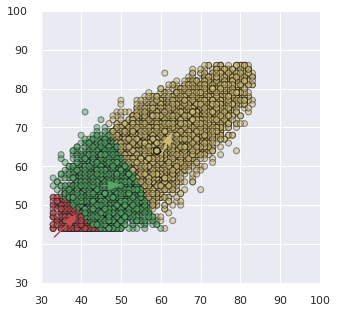

In [0]:
centroid_lama = cp.deepcopy(centroid)

def update(k):
    for i in centroid.keys():
        centroid[i][0] = np.mean(cluster[cluster['Terdekat'] == i]['passing'])
        centroid[i][1] = np.mean(cluster[cluster['Terdekat'] == i]['dribbling'])
    return k
    

centroid = update(centroid)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
for i in centroid_lama.keys():
    x_sebelum = centroid_lama[i][0]
    y_sebelum = centroid_lama[i][1]
    x_sesudah = (centroid[i][0] - centroid_lama[i][0]) * 0.75
    y_sesudah = (centroid[i][1] - centroid_lama[i][1]) * 0.75
    ax.arrow(x_sebelum, y_sebelum, x_sesudah, y_sesudah, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

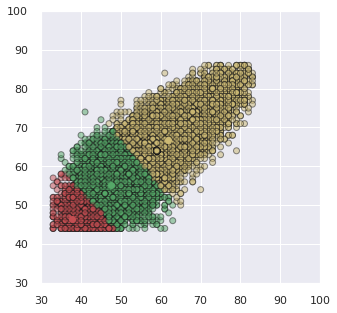

In [0]:
cluster = hitungCentroid(cluster, centroid)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**PERULANGAN PERUBAHAN CENTROID**

Melakukan perubahan sampai posisi centroid tidak berubah lagi

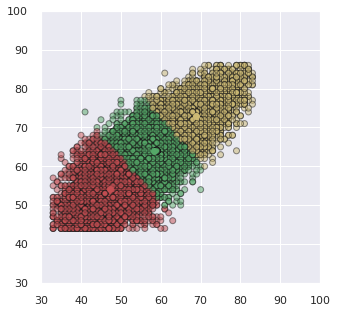

In [0]:
while True:
    centroid_terdekat = cluster['Terdekat'].copy(deep=True)
    centroid = update(centroid)
    cluster = hitungCentroid(cluster, centroid)
    if centroid_terdekat.equals(cluster['Terdekat']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**HITUNG SSE**

Menghitung SSE dari data jarak antara centroid dengan cluster yang sudah fix(Centroid yang tidak berubah lagi)

In [0]:
def sse(data,centroid):
  for i in centroid.keys():
    model = np.sqrt(centroid[i][0] + centroid[i][1])
    data['SSE'] = (model - (data["Jarak_ke_centroid_1"])) ** 2
    return data
sse(cluster,centroid)

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
3,59.0,64.0,15.363658,13.283769,0.623887,3,g,28.042572
6,59.0,64.0,15.363658,13.283769,0.623887,3,g,28.042572
7,70.0,71.0,28.346792,2.308150,13.576601,2,y,334.109336
11,54.0,67.0,14.510540,15.956606,5.314481,3,g,19.734975
12,79.0,81.0,41.611704,12.983284,26.736784,2,y,994.996801
...,...,...,...,...,...,...,...,...
18271,47.0,46.0,8.199223,34.677513,21.280779,1,r,3.492828
18272,59.0,64.0,15.363658,13.283769,0.623887,3,g,28.042572
18275,44.0,45.0,9.728378,37.379889,23.813838,1,r,0.115434
18276,47.0,47.0,7.199467,33.905596,20.442653,1,r,8.229248


**IMPORT DATA CLUSTERING KE CSV**

In [0]:
cluster.to_csv('1301174308_Hasil_akhir_Clustering.csv') 
files.download('1301174308_Hasil_akhir_Clustering.csv')
cluster.groupby('color').count()
cluster

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
3,59.0,64.0,15.363658,13.283769,0.623887,3,g,28.042572
6,59.0,64.0,15.363658,13.283769,0.623887,3,g,28.042572
7,70.0,71.0,28.346792,2.308150,13.576601,2,y,334.109336
11,54.0,67.0,14.510540,15.956606,5.314481,3,g,19.734975
12,79.0,81.0,41.611704,12.983284,26.736784,2,y,994.996801
...,...,...,...,...,...,...,...,...
18271,47.0,46.0,8.199223,34.677513,21.280779,1,r,3.492828
18272,59.0,64.0,15.363658,13.283769,0.623887,3,g,28.042572
18275,44.0,45.0,9.728378,37.379889,23.813838,1,r,0.115434
18276,47.0,47.0,7.199467,33.905596,20.442653,1,r,8.229248


# **EKSPERIMEN CLUSTER**

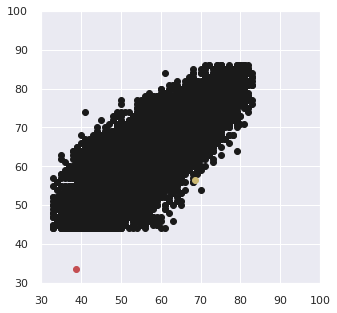

In [0]:
k = 2
# centroid[i] = [x, y]
x,y = [],[]
for i in range(k):
  x.append(round(np.random.uniform(30, 100),2))
  y.append(round(np.random.uniform(30, 100),2))
x,y
centroid = {
  i+1: [x[i],y[i]]
  for i in range(k)
}
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster["passing"], cluster["dribbling"], color="k")
colmap = {1: "r", 2: "y", 3: "g"}
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

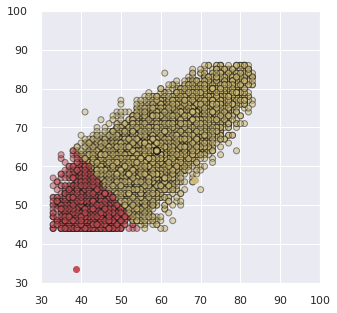

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
3,59.0,64.0,36.601948,12.133165,0.623887,2,y,28.042572
6,59.0,64.0,36.601948,12.133165,0.623887,2,y,28.042572
7,70.0,71.0,48.806379,14.638091,13.576601,2,y,334.109336
11,54.0,67.0,36.798677,17.929688,5.314481,2,y,19.734975
12,79.0,81.0,62.252410,26.714298,26.736784,2,y,994.996801
...,...,...,...,...,...,...,...,...
18271,47.0,46.0,14.968721,23.891708,21.280779,1,r,3.492828
18272,59.0,64.0,36.601948,12.133165,0.623887,2,y,28.042572
18275,44.0,45.0,12.632601,27.030237,23.813838,1,r,0.115434
18276,47.0,47.0,15.812735,23.471977,20.442653,1,r,8.229248


In [0]:
# perhitungan jarak dengan centroid sqrt((x1 - x2)^2 - (y1 - y2)^2)
def hitungCentroid(data, centroid):
    for i in centroid.keys():
        data['Jarak_ke_centroid_{}'.format(i)] = (
            np.sqrt((data['passing'] - centroid[i][0]) ** 2 + (data['dribbling'] - centroid[i][1]) ** 2)
        )
    jarakCentroid = ['Jarak_ke_centroid_{}'.format(i) for i in centroid.keys()]
    data['Terdekat'] = data.loc[:, jarakCentroid].idxmin(axis=1)
    data['Terdekat'] = data['Terdekat'].map(lambda x: int(x.lstrip('Jarak_ke_centroid_')))
    data['color'] = data['Terdekat'].map(lambda x: colmap[x])
    return data

cluster = hitungCentroid(cluster, centroid)
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

# print(cluster.head())
cluster

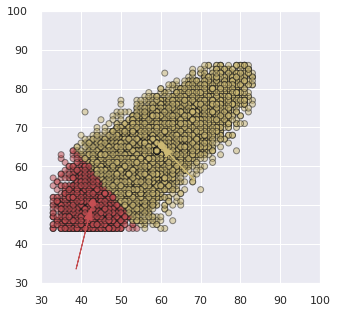

In [0]:
centroid_lama = cp.deepcopy(centroid)

def update(k):
    for i in centroid.keys():
        centroid[i][0] = np.mean(cluster[cluster['Terdekat'] == i]['passing'])
        centroid[i][1] = np.mean(cluster[cluster['Terdekat'] == i]['dribbling'])
    return k
    

centroid = update(centroid)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
for i in centroid_lama.keys():
    x_sebelum = centroid_lama[i][0]
    y_sebelum = centroid_lama[i][1]
    x_sesudah = (centroid[i][0] - centroid_lama[i][0]) * 0.75
    y_sesudah = (centroid[i][1] - centroid_lama[i][1]) * 0.75
    ax.arrow(x_sebelum, y_sebelum, x_sesudah, y_sesudah, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

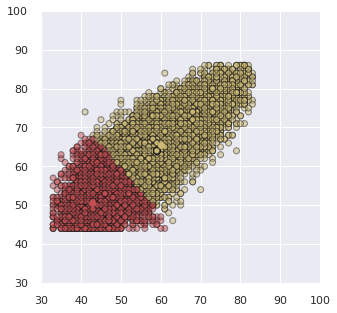

In [0]:
cluster = hitungCentroid(cluster, centroid)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

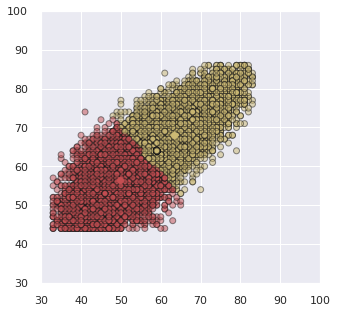

In [0]:
while True:
    centroid_terdekat = cluster['Terdekat'].copy(deep=True)
    centroid = update(centroid)
    cluster = hitungCentroid(cluster, centroid)
    if centroid_terdekat.equals(cluster['Terdekat']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

In [0]:
def sse(data,centroid):
  for i in centroid.keys():
    model = np.sqrt(centroid[i][0] + centroid[i][1])
    data['SSE'] = (model - (data["Jarak_ke_centroid_1"])) ** 2
    return data
sse(cluster,centroid)

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
3,59.0,64.0,11.926889,6.006895,0.623887,2,y,2.624409
6,59.0,64.0,11.926889,6.006895,0.623887,2,y,2.624409
7,70.0,71.0,24.927462,7.257388,13.576601,2,y,213.761223
11,54.0,67.0,11.318591,9.386788,5.314481,2,y,1.023546
12,79.0,81.0,38.172590,20.258655,26.736784,2,y,776.497419
...,...,...,...,...,...,...,...,...
18271,47.0,46.0,10.870185,27.534036,21.280779,1,r,0.317305
18272,59.0,64.0,11.926889,6.006895,0.623887,2,y,2.624409
18275,44.0,45.0,12.862253,30.172165,23.813838,1,r,6.529897
18276,47.0,47.0,9.904721,26.734982,20.442653,1,r,0.161737


In [0]:
cluster.to_csv('Eksperimen_Clustering.csv') 
# files.download('clustering.csv')
cluster.groupby('color').count()
cluster

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
3,59.0,64.0,11.926889,6.006895,0.623887,2,y,2.624409
6,59.0,64.0,11.926889,6.006895,0.623887,2,y,2.624409
7,70.0,71.0,24.927462,7.257388,13.576601,2,y,213.761223
11,54.0,67.0,11.318591,9.386788,5.314481,2,y,1.023546
12,79.0,81.0,38.172590,20.258655,26.736784,2,y,776.497419
...,...,...,...,...,...,...,...,...
18271,47.0,46.0,10.870185,27.534036,21.280779,1,r,0.317305
18272,59.0,64.0,11.926889,6.006895,0.623887,2,y,2.624409
18275,44.0,45.0,12.862253,30.172165,23.813838,1,r,6.529897
18276,47.0,47.0,9.904721,26.734982,20.442653,1,r,0.161737
